# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# #  ( example JSON)Seeing what the Json looks like to I know what keys to grab from JSON ( example JSON)
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"

# # Build query URL
# query_url = url + "appid=" + weather_api_key + "&q=" + city

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# # print(f"The weather API responded with: {weather_json}.")
# pprint (weather_json)

In [5]:
# create empty list from data from API to be stored 
city_name =[]
temperature = []
max_temp =[]
cloudiness =[]
humidity =[]
country =[]
wind_speed = []
latitude =[]
longitude =[]
datetime=[]

# Counters
city_counter =1
set_counter =1 

In [6]:
print("Beginning Data Retrieval")
print("---------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop to receive API info on each city in Cities list above

for  x,city in enumerate (cities):
    
     # Group cities as sets of 50s
#    if (x % == 0 and  x >= 50):
        #set_counter += 1
        #city_counter = 1
    response =requests.get(query_url + city).json()
    #slowling down API calls to less than 60 per minute to not go over
    time.sleep(1)
    # Print Results
    print(f"Processing Record {city_counter} of Set {set_counter} : {city}")
    
    #Increase Counter
    city_counter+=1
    
    if (x % 49 == 0 and x != 0):
        set_counter += 1
        city_counter = 1
    
    try:
        city_name.append(response["name"])
        temperature.append(response["main"]["temp"])
        max_temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        datetime.append(response["dt"])
#         print(f"Processing Record {x} : {city}")
#         x+=1
    except:
        print ("City not found. Skipping...")    
        pass
    
print("Done")

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 : mount gambier
Processing Record 2 of Set 1 : olafsvik
Processing Record 3 of Set 1 : georgetown
Processing Record 4 of Set 1 : tuktoyaktuk
Processing Record 5 of Set 1 : taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 : bethel
Processing Record 7 of Set 1 : provideniya
Processing Record 8 of Set 1 : hilo
Processing Record 9 of Set 1 : ilulissat
Processing Record 10 of Set 1 : dikson
Processing Record 11 of Set 1 : pisco
Processing Record 12 of Set 1 : souillac
Processing Record 13 of Set 1 : khatanga
Processing Record 14 of Set 1 : noumea
Processing Record 15 of Set 1 : busselton
Processing Record 16 of Set 1 : kavaratti
Processing Record 17 of Set 1 : grand gaube
Processing Record 18 of Set 1 : kulhudhuffushi
Processing Record 19 of Set 1 : sulangan
Processing Record 20 of Set 1 : belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 : rikitea
Processing Record 22 o

Processing Record 43 of Set 4 : samusu
City not found. Skipping...
Processing Record 44 of Set 4 : lasa
Processing Record 45 of Set 4 : kargasok
Processing Record 46 of Set 4 : pacific grove
Processing Record 47 of Set 4 : umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 : whitehorse
Processing Record 49 of Set 4 : margate
Processing Record 1 of Set 5 : kirillov
Processing Record 2 of Set 5 : coihaique
Processing Record 3 of Set 5 : upernavik
Processing Record 4 of Set 5 : sergeyevka
Processing Record 5 of Set 5 : pontianak
Processing Record 6 of Set 5 : pevek
Processing Record 7 of Set 5 : la asuncion
Processing Record 8 of Set 5 : marawi
Processing Record 9 of Set 5 : bengkulu
Processing Record 10 of Set 5 : vaitape
Processing Record 11 of Set 5 : campos
Processing Record 12 of Set 5 : ceyhan
Processing Record 13 of Set 5 : ancud
Processing Record 14 of Set 5 : sarangani
Processing Record 15 of Set 5 : kieta
Processing Record 16 of Set 5 : skara
Processing Record 1

Processing Record 35 of Set 8 : vostok
Processing Record 36 of Set 8 : cambridge
Processing Record 37 of Set 8 : tyukalinsk
Processing Record 38 of Set 8 : tanggu
Processing Record 39 of Set 8 : port elizabeth
Processing Record 40 of Set 8 : smithers
Processing Record 41 of Set 8 : soyo
Processing Record 42 of Set 8 : puerto penasco
Processing Record 43 of Set 8 : samalaeulu
City not found. Skipping...
Processing Record 44 of Set 8 : onega
Processing Record 45 of Set 8 : fayaoue
Processing Record 46 of Set 8 : elmadag
Processing Record 47 of Set 8 : tadine
Processing Record 48 of Set 8 : amapa
Processing Record 49 of Set 8 : morehead
Processing Record 1 of Set 9 : benguela
Processing Record 2 of Set 9 : chipata
Processing Record 3 of Set 9 : soria
Processing Record 4 of Set 9 : mazatlan
Processing Record 5 of Set 9 : santiago
Processing Record 6 of Set 9 : lobau
Processing Record 7 of Set 9 : tarut
Processing Record 8 of Set 9 : birjand
Processing Record 9 of Set 9 : gamba
Processing R

Processing Record 29 of Set 12 : jujuy
City not found. Skipping...
Processing Record 30 of Set 12 : gat
Processing Record 31 of Set 12 : belz
Processing Record 32 of Set 12 : broken hill
Processing Record 33 of Set 12 : wulanhaote
City not found. Skipping...
Processing Record 34 of Set 12 : saint-ambroise
Processing Record 35 of Set 12 : khani
Processing Record 36 of Set 12 : naryan-mar
Processing Record 37 of Set 12 : nagorsk
Processing Record 38 of Set 12 : kruisfontein
Processing Record 39 of Set 12 : kedrovyy
Processing Record 40 of Set 12 : marsabit
Processing Record 41 of Set 12 : erzin
Processing Record 42 of Set 12 : shimoda
Processing Record 43 of Set 12 : salumbar
Processing Record 44 of Set 12 : polunochnoye
Processing Record 45 of Set 12 : paris
Processing Record 46 of Set 12 : sept-iles
Processing Record 47 of Set 12 : catarman
Processing Record 48 of Set 12 : plouzane
Processing Record 49 of Set 12 : sosnovo-ozerskoye
Processing Record 1 of Set 13 : elizabeth city
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
city_data = pd.DataFrame(list(zip(city_name,temperature,max_temp,cloudiness,humidity,country,wind_speed,latitude,longitude,datetime)),
                        columns = ["City", "Temperature", "Max Temperature", "Cloudiness", "Humidity", "Country","Wind_Speed","Lat","Lng", "Date/Time"])
# city_data.head(20)
city_data.count()

City               571
Temperature        571
Max Temperature    571
Cloudiness         571
Humidity           571
Country            571
Wind_Speed         571
Lat                571
Lng                571
Date/Time          571
dtype: int64

In [41]:
city_data.head(20)

,City,Temperature,Max Temperature,Cloudiness,Humidity,Country,Wind_Speed,Lat,Lng,Date/Time
0,Mount Gambier,55.40,55.40,90,88,AU,9.22,-37.8333,140.7667,1612643536
1,Olafsvik,34.81,34.81,72,81,IS,16.33,64.8945,-23.7142,1612643694
2,George Town,79.09,81.00,20,83,MY,4.61,5.4112,100.3354,1612643591
3,Tuktoyaktuk,-16.60,-16.60,75,76,CA,18.41,69.4541,-133.0374,1612643696
4,Bethel,38.97,41.00,1,30,US,13.80,41.3712,-73.4140,1612643698
5,Provideniya,-0.22,-0.22,67,89,RU,7.72,64.3833,-173.3000,1612643701
6,Hilo,73.65,77.00,1,57,US,4.61,19.7297,-155.0900,1612643433
7,Ilulissat,21.20,21.20,20,42,GL,23.02,69.2167,-51.1000,1612643704
8,Dikson,-29.04,-29.04,88,86,RU,10.74,73.5069,80.5464,1612643564
9,Pisco,73.36,75.20,75,73,PE,11.50,-13.7000,-76.2167,1612643706


In [42]:
city_data.to_csv(path_or_buf= "../output_data/cities.csv", index =False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
new_temp = city_data[city_data.Humidity > 100]
new_temp
# city_data

,City,Temperature,Max Temperature,Cloudiness,Humidity,Country,Wind_Speed,Lat,Lng,Date/Time


In [44]:
#  Get the indices of cities that have humidity over 100%.


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

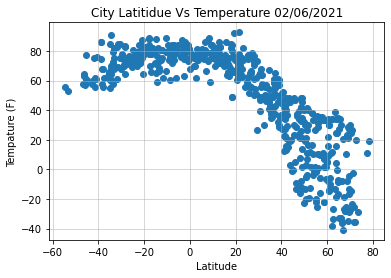

In [46]:
# create scatter plot 
plt.scatter(city_data["Lat"],city_data["Temperature"])
# X-Axis label
plt.xlabel("Latitude")
#Y Axis label
plt.ylabel("Tempature (F)")
#Title 
plt.title( "City Latitidue Vs Temperature 02/06/2021")
#set grid line
plt.grid(linestyle = '-', linewidth =1, alpha =0.5)

# plt.show()

# save image
plt.savefig("../Images/City_Lat_vs_Temp.PNG")

## Latitude vs. Humidity Plot

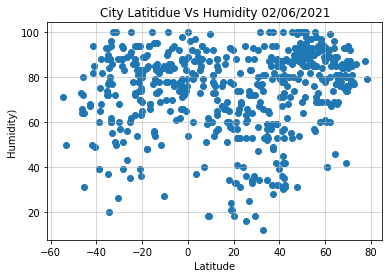

In [47]:
# create scatter plot 
plt.scatter(city_data["Lat"],city_data["Humidity"])
# X-Axis label
plt.xlabel("Latitude")
#Y Axis label
plt.ylabel("Humidity)")
#Title 
plt.title( "City Latitidue Vs Humidity 02/06/2021")
#set grid line
plt.grid(linestyle = '-', linewidth =1, alpha =0.5)

# plt.show()

# save image
plt.savefig("../Images/City_Lat_vs_Humidity.PNG")


## Latitude vs. Cloudiness Plot

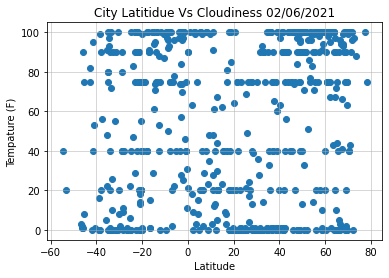

In [48]:
# create scatter plot 
plt.scatter(city_data["Lat"],city_data["Cloudiness"])
# X-Axis label
plt.xlabel("Latitude")
#Y Axis label
plt.ylabel("Tempature (F)")
#Title 
plt.title( "City Latitidue Vs Cloudiness 02/06/2021")
#set grid line
plt.grid(linestyle = '-', linewidth =1, alpha =0.5)

# plt.show()

# save image
plt.savefig("../Images/City_Lat_vs_Cloudiness.PNG")

## Latitude vs. Wind Speed Plot

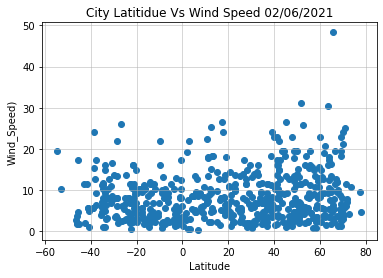

In [49]:
# create scatter plot 
plt.scatter(city_data["Lat"],city_data["Wind_Speed"])
# X-Axis label
plt.xlabel("Latitude")
#Y Axis label
plt.ylabel("Wind_Speed)")
#Title 
plt.title( "City Latitidue Vs Wind Speed 02/06/2021")
#set grid line
plt.grid(linestyle = '-', linewidth =1, alpha =0.5)

# plt.show()

# save image
plt.savefig("../Images/City_Lat_vs_Wind_Speed.PNG")

## Linear Regression

In [62]:
# Creating new DataDrame for Northern and Southern Hemisphere
north_hemisphere = city_data.loc[city_data["Lat"] >= 0]
south_hemisphere = city_data.loc[city_data["Lat"] < 0 ]



In [70]:


def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.85


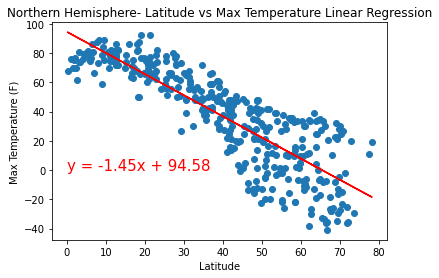

In [73]:
# Call function to create line equation
line_equation = linear_regression(north_hemisphere["Lat"],north_hemisphere["Max Temperature"])
# line equation plot on figure
annotate(line_equation,0,0)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Max Temperature (F)")
# Label Title
plt.title("Northern Hemisphere- Latitude vs Max Temperature Linear Regression")

# Save Figure
plt.savefig("../Images/North_Line_Regression_Max_temp_vs_Lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52


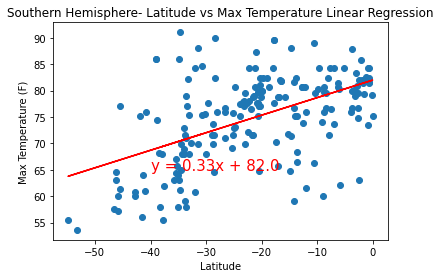

In [78]:
# Call function to create line equation
line_equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Max Temperature"])
# line equation plot on figure
annotate(line_equation,-40,65)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Max Temperature (F)")
# Label Title
plt.title("Southern Hemisphere- Latitude vs Max Temperature Linear Regression")

# Save Figure
plt.savefig("../Images/South_Line_Regression_Max_temp_vs_Lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


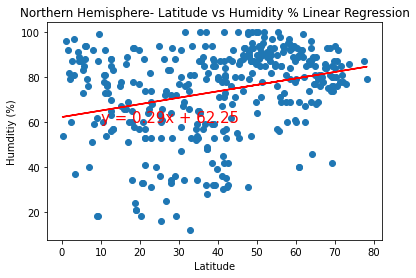

In [79]:
# Call function to create line equation
line_equation = linear_regression(north_hemisphere["Lat"],north_hemisphere["Humidity"])
# line equation plot on figure
annotate(line_equation,10,60)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Humditiy (%)")
# Label Title
plt.title("Northern Hemisphere- Latitude vs Humidity % Linear Regression")

# Save Figure
plt.savefig("../Images/North_Line_Regression_Humidity_vs_Lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


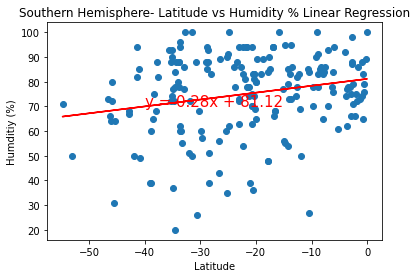

In [80]:
# Call function to create line equation
line_equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Humidity"])
# line equation plot on figure
annotate(line_equation,-40,70)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Humditiy (%)")
# Label Title
plt.title("Southern Hemisphere- Latitude vs Humidity % Linear Regression")

# Save Figure
plt.savefig("../Images/South_Line_Regression_Humidity_vs_Lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33


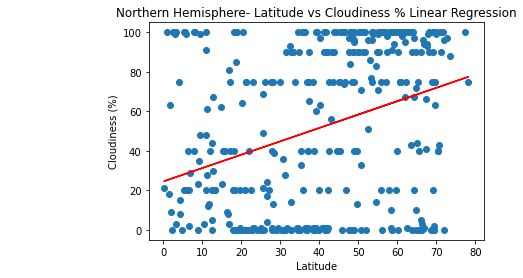

In [84]:
# Call function to create line equation
line_equation = linear_regression(north_hemisphere["Lat"],north_hemisphere["Cloudiness"])
# line equation plot on figure
annotate(line_equation,-40,70)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Cloudiness (%)")
# Label Title
plt.title("Northern Hemisphere- Latitude vs Cloudiness % Linear Regression")

# Save Figure
plt.savefig("../Images/North_Line_Regression_Cloudiness_vs_Lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33


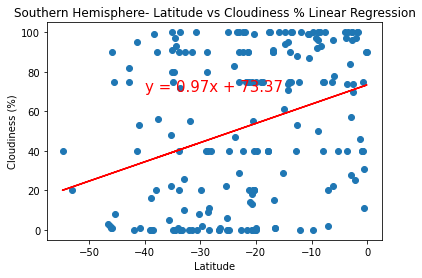

In [85]:
# Call function to create line equation
line_equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Cloudiness"])
# line equation plot on figure
annotate(line_equation,-40,70)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Cloudiness (%)")
# Label Title
plt.title("Southern Hemisphere- Latitude vs Cloudiness % Linear Regression")

# Save Figure
plt.savefig("../Images/South_Line_Regression_Cloudiness_vs_Lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.1


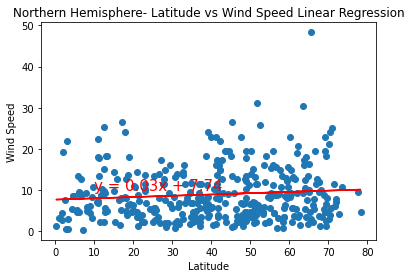

In [93]:
# Call function to create line equation
line_equation = linear_regression(north_hemisphere["Lat"],north_hemisphere["Wind_Speed"])
# line equation plot on figure
annotate(line_equation,10,10)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Wind Speed")
# Label Title
plt.title("Northern Hemisphere- Latitude vs Wind Speed Linear Regression")

# Save Figure
plt.savefig("../Images/North_Line_Regression_Wind_Speed_vs_Lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.14


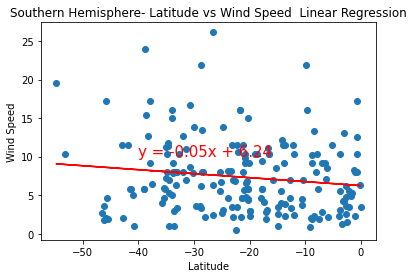

In [94]:
# Call function to create line equation
line_equation = linear_regression(south_hemisphere["Lat"],south_hemisphere["Wind_Speed"])
# line equation plot on figure
annotate(line_equation,-40,10)
# Label X-Axis
plt.xlabel("Latitude")
# Label Y-Axis
plt.ylabel("Wind Speed")
# Label Title
plt.title("Southern Hemisphere- Latitude vs Wind Speed  Linear Regression")

# Save Figure
plt.savefig("../Images/South_Line_Regression_Wind_Speed_vs_Lat.png")